In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = mnist.load_data()


In [2]:
X_val = X_train[3000:4000]
Y_val = Y_train[3000:4000]
X_train = X_train[:3000]
Y_train = Y_train[:3000]
X_test = X_test_org[:1000]
Y_test = Y_test_org[:1000]

X_train = X_train.reshape(3000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [3]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [4]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
____

1000/1000 [==============================] - 1s 864us/sample - loss: 0.1002 - acc: 0.9690
Test loss: 0.10021683648308681
Test accuracy: 0.969


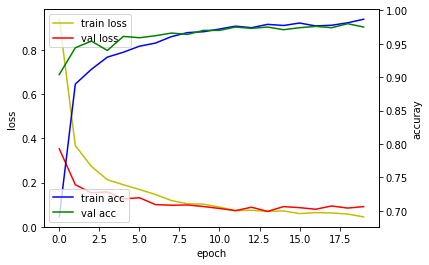

In [5]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [6]:
(OX_train, OY_train), (OX_test, OY_test) = fashion_mnist.load_data()
OX_test = OX_test[:1000]
OY_test = OY_test[:1000]
OY_test = to_categorical(OY_test)
OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0
test_loss, test_acc = model.evaluate(OX_test_reshape, OY_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
predictions = model.predict(OX_test_reshape)

1000/1000 [==============================] - 1s 530us/sample - loss: 7.8994 - acc: 0.0320
Test loss: 7.899401459693909
Test accuracy: 0.032


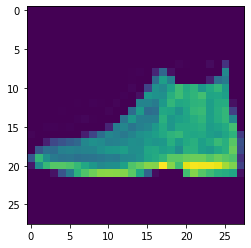

[3.0841776e-03 3.4505084e-02 7.4158651e-01 9.0427371e-03 1.5151565e-04
 1.8852310e-01 9.1387652e-04 1.2713106e-04 2.1695621e-02 3.7010465e-04]


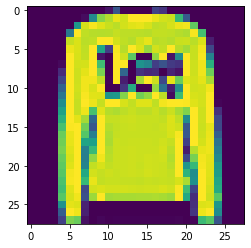

[9.7914165e-01 4.0994287e-06 5.9323971e-05 2.8972601e-04 2.5737828e-07
 3.9754518e-06 1.3606142e-03 1.7254459e-02 7.5267983e-04 1.1334072e-03]


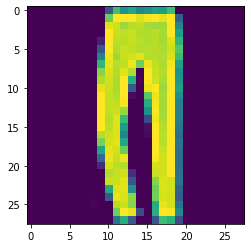

[1.5565879e-03 8.6795320e-05 5.8958926e-06 1.2004461e-05 1.9162954e-01
 4.2821066e-06 2.3766626e-02 2.5039839e-02 2.0955009e-03 7.5580299e-01]


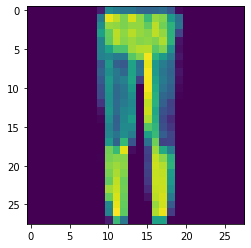

[2.6835586e-04 8.6155272e-04 3.4642647e-04 5.0146156e-04 1.2985281e-02
 8.6300288e-06 3.9887632e-04 5.7043380e-01 2.8974153e-03 4.1129822e-01]


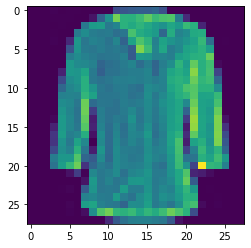

[9.09420669e-01 2.71765486e-04 1.76110351e-03 2.59027188e-03
 1.09673936e-04 4.99929069e-04 2.08661682e-03 6.79971799e-02
 3.72752361e-03 1.15352664e-02]


In [7]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

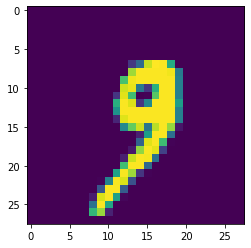

Original:  9
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Y:  9


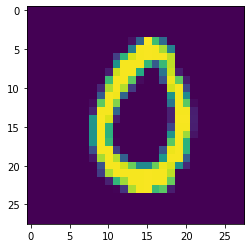

Original:  0
Predicted probabilities:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  0


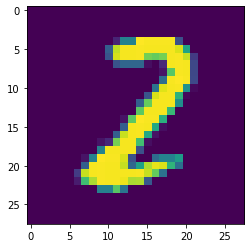

Original:  2
Predicted probabilities:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  2


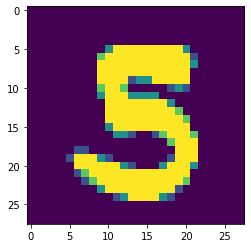

Original:  5
Predicted probabilities:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Y:  5


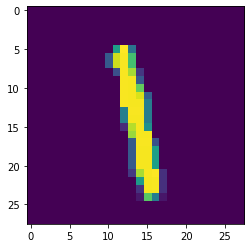

Original:  1
Predicted probabilities:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  1


In [8]:
X_check = X_test_org[1000:2000]
X_check = X_check.reshape(1000,28,28,1)
Xpredictions = model.predict(X_check)

for i in range(1000,1005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-1000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-1000]))